#Data loading and Preparation

##Data Loading

In [1]:
#Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#Loading data
path = '/content/4A_TB_cleaned_replicated.xlsx'
data =pd.read_excel(path)
data.head(2)

,UNIT,IP NUMBER,SEX,AGE,RELIGION,DISTRICT OF RESIDENCE,WORKING DIAGNOSIS,OUT COME,NUMBER OF PREVIOUS ADMISSIONS,TB_type,...,DAY OF ADMISSION,YEAR OF ADMISSION,DURATION,Survival_Week 1,Survival_Week 2,Survival_Week 3,Survival_Week 4,REGION,ADDITIONAL WORKING DIAGNOSIS,NUMBER OF ADDITIONAL WORKING DIAGNOSIS
0,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,...,Tuesday,2010,6,0,0,0,0,CENTRAL,"ISS,,",1
1,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,...,Tuesday,2010,6,0,0,0,0,CENTRAL,"ISS,,",1


#**Data Preprocessing**

In [3]:
col_to_remove = ['DURATION', 'OUT COME', 'IP NUMBER']
data1 = data.drop(columns=col_to_remove)

In [4]:
#Encoding categorical features
non_features = ['NUMBER OF ADDITIONAL WORKING DIAGNOSIS','AGE','NUMBER OF PREVIOUS ADMISSIONS',
                'Survival_Week 1',	'Survival_Week 2',	'Survival_Week 3',	'Survival_Week 4']
data2 = data1.drop(columns=non_features)

text_columns = data2.select_dtypes(include=['object']).columns

data_enc = pd.get_dummies(data1, columns=text_columns)

In [5]:
data_enc.sample(4)

,AGE,NUMBER OF PREVIOUS ADMISSIONS,YEAR OF ADMISSION,Survival_Week 1,Survival_Week 2,Survival_Week 3,Survival_Week 4,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,UNIT_GI,UNIT_IDF,...,"ADDITIONAL WORKING DIAGNOSIS_UTI,BRONCHIECTASIS","ADDITIONAL WORKING DIAGNOSIS_UTI,HIV","ADDITIONAL WORKING DIAGNOSIS_UTI,ISS","ADDITIONAL WORKING DIAGNOSIS_UTI,PUD,ORAL CANDIDIASIS,ISS","ADDITIONAL WORKING DIAGNOSIS_VIRAL GE,ISS","ADDITIONAL WORKING DIAGNOSIS_VIRAL MENINGITIS,ISS","ADDITIONAL WORKING DIAGNOSIS_WASTING SYNDROME,ISS","ADDITIONAL WORKING DIAGNOSIS_WASTING SYNDROME,ORAL CANDIDIASIS,HIV",ADDITIONAL WORKING DIAGNOSIS_Z21,"ADDITIONAL WORKING DIAGNOSIS_myeloproliferat,Malaria,"
68278,38,1,2013,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
80320,29,0,2018,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
16917,51,0,2019,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
36460,86,1,2013,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87576 entries, 0 to 87575
Columns: 2686 entries, AGE to ADDITIONAL WORKING DIAGNOSIS_myeloproliferat,Malaria,
dtypes: int64(8), uint8(2678)
memory usage: 229.0 MB


##Normalization and Visualization

In [7]:
#Transforming the continuous features
transform_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS']
for col in transform_features:
  data_enc[col] = np.log1p(data_enc[col])

#Second transformation
data_enc['NUMBER OF PREVIOUS ADMISSIONS'] = np.log1p(data_enc['NUMBER OF PREVIOUS ADMISSIONS'])


In [8]:
#Normalizing and Standardizing continuous features
normalise_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS','NUMBER OF ADDITIONAL WORKING DIAGNOSIS']
scaler = StandardScaler()
data_enc[normalise_features] = scaler.fit_transform(data_enc[normalise_features])


<function matplotlib.pyplot.show(close=None, block=None)>

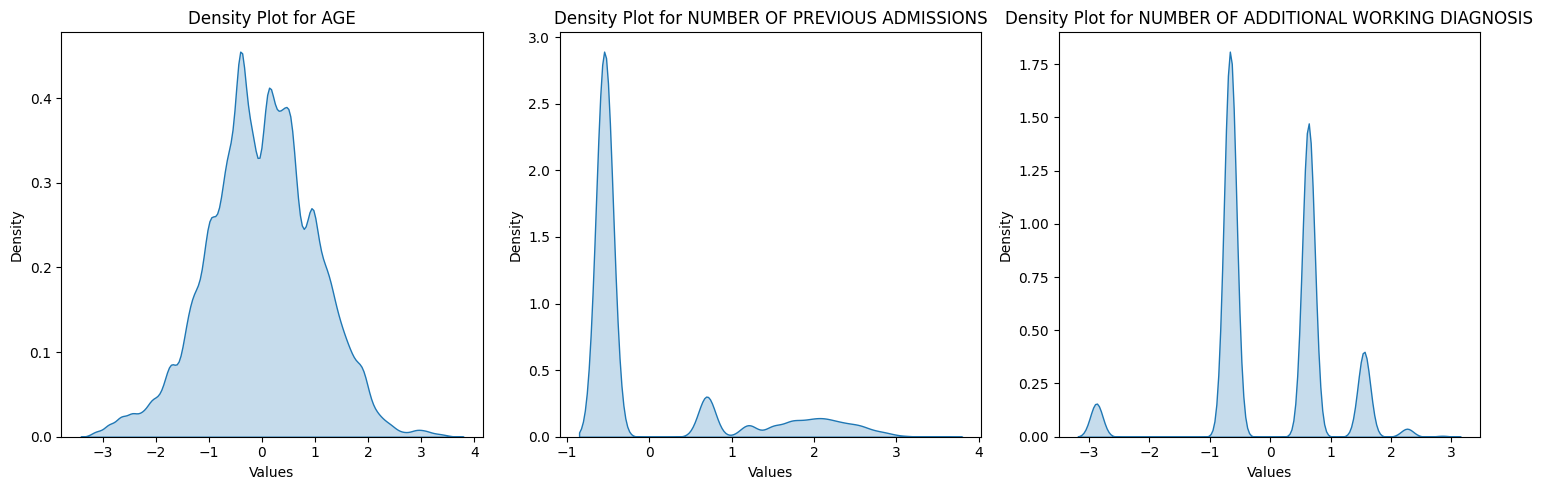

In [9]:
#Plotting Density plot
import seaborn as sns

continuous_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS','NUMBER OF ADDITIONAL WORKING DIAGNOSIS']

fig, axes = plt.subplots(1, len(continuous_features), figsize=(15, 5))

for i, col in enumerate(continuous_features):
  sns.kdeplot(data_enc[col], fill=True,ax=axes[i])
  axes[i].set_title(f'Density Plot for {col}')
  axes[i].set_xlabel('Values')
  axes[i].set_ylabel('Density')
# plt.figure(figsize=(8,9))
# plt.bar(data['AGE'])
plt.tight_layout()
plt.show

In [10]:
data_enc.sample(5)

,AGE,NUMBER OF PREVIOUS ADMISSIONS,YEAR OF ADMISSION,Survival_Week 1,Survival_Week 2,Survival_Week 3,Survival_Week 4,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,UNIT_GI,UNIT_IDF,...,"ADDITIONAL WORKING DIAGNOSIS_UTI,BRONCHIECTASIS","ADDITIONAL WORKING DIAGNOSIS_UTI,HIV","ADDITIONAL WORKING DIAGNOSIS_UTI,ISS","ADDITIONAL WORKING DIAGNOSIS_UTI,PUD,ORAL CANDIDIASIS,ISS","ADDITIONAL WORKING DIAGNOSIS_VIRAL GE,ISS","ADDITIONAL WORKING DIAGNOSIS_VIRAL MENINGITIS,ISS","ADDITIONAL WORKING DIAGNOSIS_WASTING SYNDROME,ISS","ADDITIONAL WORKING DIAGNOSIS_WASTING SYNDROME,ORAL CANDIDIASIS,HIV",ADDITIONAL WORKING DIAGNOSIS_Z21,"ADDITIONAL WORKING DIAGNOSIS_myeloproliferat,Malaria,"
78548,-0.626334,-0.545785,2018,1,1,1,1,1.552604,0,0,...,0,0,0,0,0,0,0,0,0,0
42388,0.203901,1.718000,2012,1,1,1,1,0.632632,1,0,...,0,0,0,0,0,0,0,0,0,0
62946,-1.132132,-0.545785,2017,1,1,1,1,0.632632,0,1,...,0,0,0,0,0,0,0,0,0,0
3508,0.294783,-0.545785,2012,0,0,0,0,1.552604,0,0,...,0,0,0,0,0,0,0,0,0,0
34300,0.553734,-0.545785,2019,1,1,1,1,-0.663996,0,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, LSTM, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras import layers
tf.random.set_seed(42)
np.random.seed(42)



In [12]:
# Extract features (X) and target (y) data
X = data_enc.drop(columns=["Survival_Week 1", "Survival_Week 2", "Survival_Week 3", "Survival_Week 4"])
y = data_enc[["Survival_Week 1", "Survival_Week 2", "Survival_Week 3", "Survival_Week 4"]]

#**Model training**

In [13]:
from sklearn.metrics import accuracy_score
# Extract features (X) and target (y) data
X = data_enc.drop(columns=["Survival_Week 1", "Survival_Week 2", "Survival_Week 3", "Survival_Week 4"])
y = data_enc[["Survival_Week 1", "Survival_Week 2", "Survival_Week 3", "Survival_Week 4"]]

# Set the sequence length to 7 to capture a week's worth of data
sequence_length = 7
num_features = X.shape[1]

# Create lists to hold the reshaped data
X_reshaped_list = []
y_reshaped_list = []

# Iterate through the data to create sequences
for i in range(0, len(X), sequence_length):
  X_sequence = X.iloc[i:i+sequence_length]
  y_sequence = y.iloc[i:i+sequence_length]

  # Check if the sequence length is less than 7
  if len(X_sequence) < sequence_length:
      continue

  X_reshaped_list.append(X_sequence.values)
  y_reshaped_list.append(y_sequence.values)

# Combine the lists into arrays
X_reshaped = np.array(X_reshaped_list)
y_reshaped = np.array(y_reshaped_list)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)


In [14]:

# Defining parameters
num_features = X_train.shape[2]
num_weeks = 4
num_epochs = 50
batch_size = 32

models = [] # a list to store the models
lambda_1 = 0.01 #regularization parameter (lambda_1)

# custom loss function for logistic regression with L2 regularization
def custom_loss(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  logistic_loss = tf.reduce_mean(tf.math.log(1 + tf.exp(-y_true * y_pred)))
  l2_regularization = 0.5 * lambda_1 * tf.reduce_sum(tf.square(model.trainable_weights[0]))
  total_loss = logistic_loss + l2_regularization
  return total_loss

# neural network with an LSTM layer
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1], X_train.shape[2])),
    layers.LSTM(20, return_sequences=False),
    layers.Dense(4, activation='sigmoid', use_bias=True, kernel_regularizer=keras.regularizers.l2(lambda_1))
])
model.compile(optimizer='adam', loss=custom_loss, metrics=['accuracy'])

accuracy_scores = [] # list to store accuracy for each week

# Training a model for each week
for week in range(num_weeks):
    print(f"Training for Survival_Week {week + 1}")
    model.fit(X_train, y_train[:, week], epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test[:, week]))
    models.append(model)

    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)
    accuracy = accuracy_score(y_test[:, week], y_pred_binary)

    # Store the accuracy in the list
    accuracy_scores.append(accuracy)


Training for Survival_Week 1
Epoch 1/50
313/313 [==============================] - 10s 22ms/step - loss: 0.6318 - accuracy: 0.1570 - val_loss: 0.5726 - val_accuracy: 0.0324
Epoch 2/50
313/313 [==============================] - 7s 22ms/step - loss: 0.5675 - accuracy: 0.0351 - val_loss: 0.5629 - val_accuracy: 0.0324
Epoch 3/50
313/313 [==============================] - 6s 18ms/step - loss: 0.5623 - accuracy: 0.0209 - val_loss: 0.5602 - val_accuracy: 0.0084
Epoch 4/50
313/313 [==============================] - ETA: 0s - loss: 0.5602 - accuracy: 0.0071

KeyboardInterrupt: ignored

In [ ]:
# accuracy for each week
for week, accuracy in enumerate(accuracy_scores):
    print(f"Week {week + 1} Accuracy: {accuracy}")

#Model training

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from tensorflow.keras.regularizers import l2
tf.random.set_seed(42)

In [ ]:
#extracting features and targets
targets = ['Survival_Week 1',	'Survival_Week 2',	'Survival_Week 3',	'Survival_Week 4']
X = data_enc.drop(columns=targets).values
y = data_enc[['Survival_Week 1',	'Survival_Week 2',	'Survival_Week 3',	'Survival_Week 4']].values


#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Define the L2 regularization strength
l2_lambda = 0.00001

# neural network model for logistic regression
def logistic_regression_model(input_dim, learning_rate):
    inputs = keras.Input(shape=(input_dim,))
    outputs = keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=l2(l2_lambda))(inputs)
    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

accuracy_scores = []  # list to store accuracy for each week
auc_scores = []  # list to store AUC for each week
training_losses = []
validation_losses = []

# Initializing models for each week using a loop
num_weeks = 4
models = [logistic_regression_model(input_dim=X.shape[1], learning_rate=0.001) for _ in range(num_weeks)]

num_epochs = 30
batch_size = 32

for week in range(num_weeks):
    model = models[week]
    history = model.fit(X_train, y_train[:, week], epochs=num_epochs,
                        batch_size=batch_size, validation_data=(X_test, y_test[:, week]))

    # Extracting training and validation loss
    training_losses.append(history.history['loss'])
    validation_losses.append(history.history['val_loss'])

    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)
    accuracy = accuracy_score(y_test[:, week], y_pred_binary)
    auc = roc_auc_score(y_test[:, week], y_pred)  # Calculate AUC


    print(f'Accuracy for Week {week}: {accuracy}')
    print(f'AUC for Week {week}: {auc}')

    # Store the accuracy and AUC in their respective lists
    accuracy_scores.append(accuracy)
    auc_scores.append(auc)


In [ ]:
# printing accuracy
for week, accuracy in enumerate(accuracy_scores):
  print(f"Week {week + 1} Accuracy: {accuracy}")


Week 1 Accuracy: 0.8412308746289107
Week 2 Accuracy: 0.7944736241150948
Week 3 Accuracy: 0.7917332724366294
Week 4 Accuracy: 0.7888216487782599


In [ ]:
# Separate loop to print AUC scores
for week, auc in enumerate(auc_scores):
    print(f'AUC for Week {week}: {auc}')

AUC for Week 0: 0.8946836962917414
AUC for Week 1: 0.8882141494567919
AUC for Week 2: 0.8896125745761543
AUC for Week 3: 0.8895011378879787


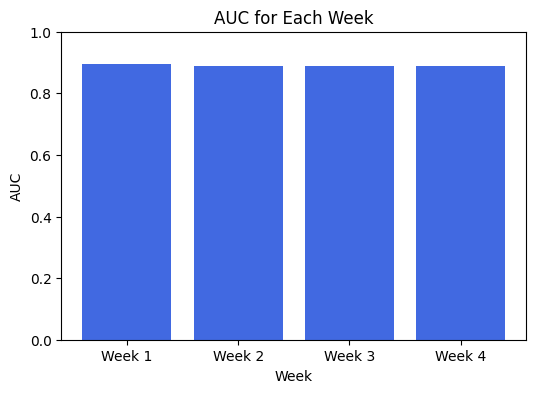

In [ ]:
# Create a bar plot to visualize AUC for each week
plt.figure(figsize=(6, 4))
plt.bar(range(num_weeks), auc_scores, color='royalblue')
plt.xlabel('Week')
plt.ylabel('AUC')
plt.title('AUC for Each Week')
plt.xticks(range(num_weeks), [f'Week {week + 1}' for week in range(num_weeks)])
plt.ylim(0, 1.0)  # Set the y-axis limit between 0 and 1
plt.show()

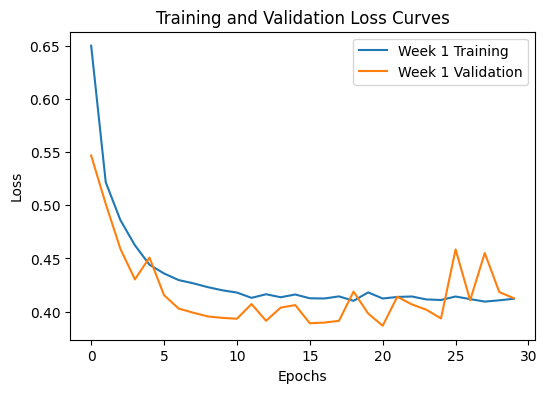

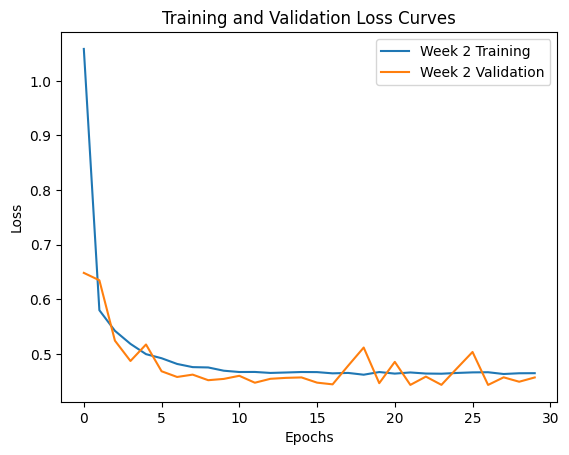

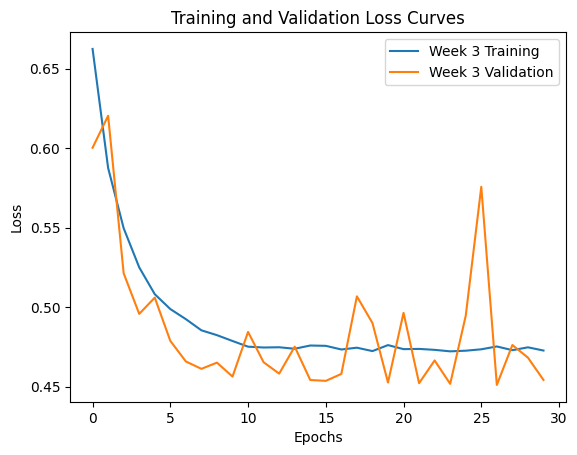

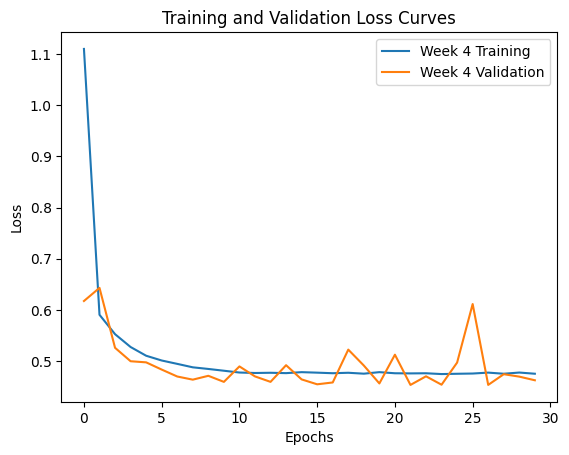

In [ ]:
# Plot training and validation loss curves
plt.figure(figsize=(6, 4))
for week in range(num_weeks):
    plt.plot(training_losses[week], label=f'Week {week + 1} Training')
    plt.plot(validation_losses[week], label=f'Week {week + 1} Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Curves')
    plt.legend()
    plt.show()

#Model 2 binary crossentropy

In [ ]:
#extracting features and targets
targets = ['Survival_Week 1',	'Survival_Week 2',	'Survival_Week 3',	'Survival_Week 4']
X = data_enc.drop(columns=targets).values
y = data_enc[['Survival_Week 1',	'Survival_Week 2',	'Survival_Week 3',	'Survival_Week 4']].values


#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from tensorflow.keras.regularizers import l1

# Define the L2 regularization strength
l2_lambda = 0.0001

# neural network model for logistic regression
def logistic_regression_model(input_dim):
    inputs = keras.Input(shape=(input_dim,))
    outputs = keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=l1(l2_lambda))(inputs)
    model = keras.Model(inputs, outputs)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

accuracy_scores = []  # list to store accuracy for each week
auc_scores = []  # list to store AUC for each week

# Initializing models for each week using a loop
num_weeks = 4
models = [logistic_regression_model(input_dim=X.shape[1]) for _ in range(num_weeks)]

num_epochs = 5
batch_size = 16

for week in range(num_weeks):
    model = models[week]
    model.fit(X_train, y_train[:, week], epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test[:, week]))

    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)
    accuracy = accuracy_score(y_test[:, week], y_pred_binary)
    auc = roc_auc_score(y_test[:, week], y_pred)  # Calculate AUC

    print(f'Accuracy for Week {week}: {accuracy}')
    print(f'AUC for Week {week}: {auc}')

    # Store the accuracy and AUC in their respective lists
    accuracy_scores.append(accuracy)
    auc_scores.append(auc)


Epoch 1/5
2190/2190 [==============================] - 7s 3ms/step - loss: 0.6209 - accuracy: 0.6985 - val_loss: 0.6514 - val_accuracy: 0.6288
Epoch 2/5
2190/2190 [==============================] - 5s 2ms/step - loss: 0.5988 - accuracy: 0.7115 - val_loss: 0.5547 - val_accuracy: 0.7330
Epoch 3/5
2190/2190 [==============================] - 7s 3ms/step - loss: 0.5866 - accuracy: 0.7249 - val_loss: 0.5987 - val_accuracy: 0.7229
Epoch 4/5
2190/2190 [==============================] - 5s 2ms/step - loss: 0.5775 - accuracy: 0.7358 - val_loss: 0.7456 - val_accuracy: 0.4979
Epoch 5/5
274/274 [==============================] - 0s 1ms/step
Accuracy for Week 0: 0.736355332267641
AUC for Week 0: 0.7630132837260153
Epoch 1/5
2190/2190 [==============================] - 6s 3ms/step - loss: 0.8514 - accuracy: 0.5982 - val_loss: 0.6459 - val_accuracy: 0.6328
Epoch 2/5
2190/2190 [==============================] - 6s 3ms/step - loss: 0.6620 - accuracy: 0.6310 - val_loss: 0.6184 - val_accuracy: 0.6900
Epo

In [ ]:
# printing accuracy
for week, accuracy in enumerate(accuracy_scores):
  print(f"Week {week + 1} Accuracy: {accuracy}")


Week 1 Accuracy: 0.736355332267641
Week 2 Accuracy: 0.6551724137931034
Week 3 Accuracy: 0.6145238638958667
Week 4 Accuracy: 0.6305092486869148


In [ ]:
# Separate loop to print AUC scores
for week, auc in enumerate(auc_scores):
    print(f'AUC for Week {week}: {auc}')

AUC for Week 0: 0.7630132837260153
AUC for Week 1: 0.7544737538616404
AUC for Week 2: 0.7533968645208757
AUC for Week 3: 0.7537660052452754
